In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [8]:
#FG%
#ORB
#DRB
#TRBPTS


#PART A
file='2017.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])
trainx=np.transpose(np.vstack((fg, trb)))
#print(trainx.shape)
#print(trb)
pts = list(df['PTS'][1:])
meanfb = np.mean(fg)
meantrb = np.mean(trb)

beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))

print('weights for FG% and TRB')
print(beta)

print('Contribution for FG% and TRB in %')
print(np.multiply(beta, [meanfb, meantrb]))

print('We can see that weight for TRB is very less. But it does not mean that contribution of TRB is very less in predicting PTS. because values of FG% and TRB are not normalized')
print('We need to multiply weights with mean values of respective predictor to know about real contribution of that predictor.')
print('Following above approach, We can see that TRB contributes around 30% to total points(PTS)')
# We can see that weight for TRB is very less. But it doesn't mean that contribution of TRB is very less in predicting PTS. because values of FG% and TRB are not normalized
# We need to multiply weights with mean values of respective predictor to know about real contribution of that predictor.
# Following above approach, We can see that TRB contributes around 30% to total points(PTS)

weights for FG% and TRB
[165.62434772   0.68659874]
Contribution for FG% and TRB in %
[75.72345178 29.88077721]
We can see that weight for TRB is very less. But it does not mean that contribution of TRB is very less in predicting PTS. because values of FG% and TRB are not normalized
We need to multiply weights with mean values of respective predictor to know about real contribution of that predictor.
Following above approach, We can see that TRB contributes around 30% to total points(PTS)


In [12]:
#PART B

file='2017.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])
orb = list(df['ORB'][1:])
drb = list(df['DRB'][1:])
trainx=np.transpose(np.vstack((fg, trb,orb,drb)))
#print(trainx)
#print(trb)
pts = list(df['PTS'][1:])
meanfb = np.mean(fg)
meantrb = np.mean(trb)
meanorb = np.mean(orb)
meandrb = np.mean(drb)

beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))

print('4b')
print('weights for FG% , TRB , ORB , DRB')
print(beta)

print('Contribution for FG% , TRB , ORB , DRB in %')
print(np.multiply(beta, [meanfb, meantrb, meanorb, meandrb]))

print('we can see that contribution of TRB is more than 100%!! which is not possible. It is happening because of high correlation between TRB and other new predictors added(ORB and DRB). High correlation between two predictors(variables) represents multicollinearity')

weights for FG% , TRB , ORB , DRB
[162.50582183   2.73594995  -2.11125196  -1.98843192]
Contribution for FG% , TRB , ORB , DRB in %
[ 74.29766174 119.0685419  -21.39401981 -66.36722953]
we can see that contribution of TRB is more than 100%!! which is not possible. It is happening because of high correlation between TRB and other new predictors added(ORB and DRB). High correlation between two predictors(variables) represents multicollinearity


mape % ->  1.5294427292040496
sse ->  139.46621778218994


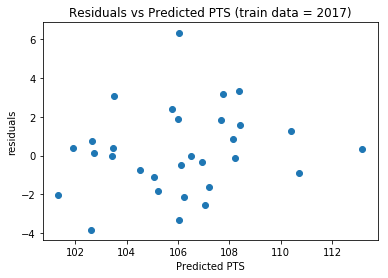

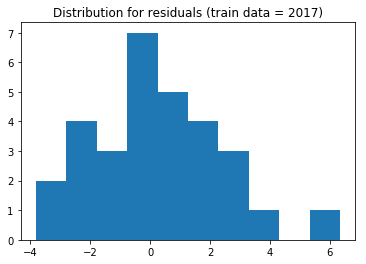

mape % ->  1.8610517990239506
sse ->  199.14276433206484


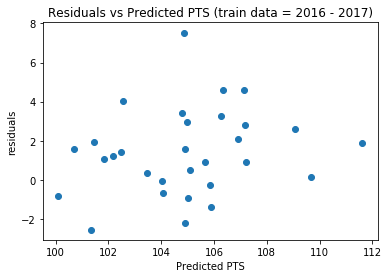

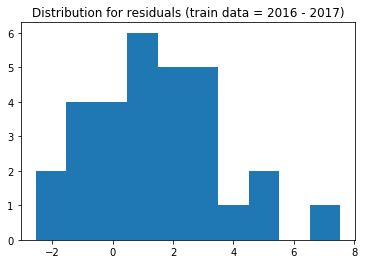

mape % ->  3.9272071019422197
sse ->  680.8093302199828


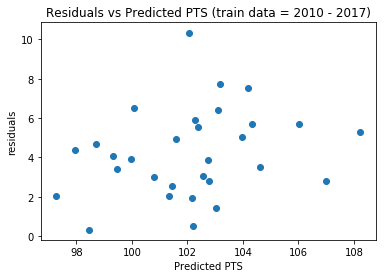

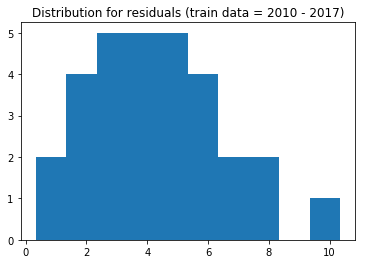

In [17]:
#PART C

file='2017.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])

trainx=np.transpose(np.vstack((fg, trb)))
pts = list(df['PTS'][1:])
beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))
#print(beta)

file='2018.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])
testx=np.transpose(np.vstack((fg, trb)))
testpts= list(df['PTS'][1:])
predpts=np.matmul(testx,beta)
#print(predpts)

mape=sum(np.divide(abs(np.subtract(predpts,testpts)),testpts))/len(testpts)
print("mape % -> ",mape*100 )

sse=sum(np.multiply(np.subtract(predpts,testpts),np.subtract(predpts,testpts)))
print("sse -> ",sse)

residuals= np.subtract(testpts,predpts)
plt.figure(0)
plt.scatter(predpts,residuals)
plt.xlabel('Predicted PTS')
plt.ylabel('residuals')
plt.title('Residuals vs Predicted PTS (train data = 2017)')
plt.savefig('4_d_1.jpg')
plt.figure(1)
#sns.distplot(residuals,kde=False)
x,y,z=plt.hist(residuals,10)
plt.title('Distribution for residuals (train data = 2017)')
plt.savefig('4_e_1.jpg')
plt.show()

fg=[]
trb=[]
pts=[]
for i in range(2016,2018):
    file=str(i)+'.xls'
    #print(file)
    df = pd.read_excel(file)
    
    temp = list(df['FG%'][1:])
    fg=np.concatenate((fg,temp), axis=0)
    
    temp = list(df['TRB'][1:])
    trb=np.concatenate((trb,temp), axis=0)
    
    temp = list(df['PTS'][1:])
    pts=np.concatenate((pts,temp), axis=0)

trainx=np.transpose(np.vstack((fg, trb)))
#print(trainx.shape)
#print(pts.shape)
beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))
#print(beta)
predpts=np.matmul(testx,beta)

mape=sum(np.divide(abs(np.subtract(predpts,testpts)),testpts))/len(testpts)
print("mape % -> ",mape*100 )

sse=sum(np.multiply(np.subtract(predpts,testpts),np.subtract(predpts,testpts)))
print("sse -> ",sse)

residuals= np.subtract(testpts,predpts)
plt.figure(2)
plt.scatter(predpts,residuals)
plt.xlabel('Predicted PTS')
plt.ylabel('residuals')
plt.title('Residuals vs Predicted PTS (train data = 2016 - 2017)')
plt.savefig('4_d_2.jpg')
plt.figure(3)
#sns.distplot(residuals,kde=False)
x,y,z=plt.hist(residuals,10)
plt.title('Distribution for residuals (train data = 2016 - 2017)')
plt.savefig('4_e_2.jpg')
plt.show()



fg=[]
trb=[]
pts=[]
for i in range(2010,2018):
    file=str(i)+'.xls'
    #print(file)
    df = pd.read_excel(file)
    
    temp = list(df['FG%'][1:])
    fg=np.concatenate((fg,temp), axis=0)
    
    temp = list(df['TRB'][1:])
    trb=np.concatenate((trb,temp), axis=0)
    
    temp = list(df['PTS'][1:])
    pts=np.concatenate((pts,temp), axis=0)

trainx=np.transpose(np.vstack((fg, trb)))
#print(trainx.shape)
#print(pts.shape)
beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))
#print(beta)
predpts=np.matmul(testx,beta)

mape=sum(np.divide(abs(np.subtract(predpts,testpts)),testpts))/len(testpts)
print("mape % -> ",mape*100 )

sse=sum(np.multiply(np.subtract(predpts,testpts),np.subtract(predpts,testpts)))
print("sse -> ",sse)

residuals= np.subtract(testpts,predpts)
plt.figure(2)
plt.scatter(predpts,residuals)
plt.xlabel('Predicted PTS')
plt.ylabel('residuals')
plt.title('Residuals vs Predicted PTS (train data = 2010 - 2017)')
plt.savefig('4_d_3.jpg')
plt.figure(3)
#sns.distplot(residuals)
x,y,z=plt.hist(residuals,10)
plt.title('Distribution for residuals (train data = 2010 - 2017)')
plt.savefig('4_e_3.jpg')
plt.show()


In [21]:
print('4d')
print('In all 3 scatter graphs we can see that vertical width of scatter points is not decreasing or increasing. That means the range of the residuals looks essentially constant across the levels of predicted variable PTS. Hence we can conclude that variance of resisuals is constant across all predicted values of PTS')
print('If variance of residuals is not constant it means that it wo\'nt follow normal curve. Which is the basic assumption we are taking while we do regression fit. Hence, if variance is not constant it means that regression model is not good enough')
print('')
print('4e')
print('From distribution of residuals in all three graphs, we can say that they are closely normal')
print('In good regression fit, we should expect a regression model to err in predicting a response in a random fashion; the model should predict values higher than actual and lower than actual with equal probability. That means that distribution of residuals should look like normal. If it is not normal, then our regression model is not good to use')

4d
In all 3 scatter graphs we can see that vertical width of scatter points is not decreasing or increasing. That means the range of the residuals looks essentially constant across the levels of predicted variable PTS. Hence we can conclude that variance of resisuals is constant across all predicted values of PTS
If variance of residuals is not constant it means that it wo'nt follow normal curve. Which is the basic assumption we are taking while we do regression fit. Hence, if variance is not constant it means that regression model is not good enough

4e
From distribution of residuals in all three graphs, we can say that they are closely normal
In good regression fit, we should expect a regression model to err in predicting a response in a random fashion; the model should predict values higher than actual and lower than actual with equal probability. That means that distribution of residuals should look like normal. If it is not normal, then our regression model is not good to use
